In [1]:
import pandas as pd
import re
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train.tsv',sep='\t')

<font size="5" >Features</font>

In [3]:
df.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Keywords', 'cast', 'crew'],
      dtype='object')

In [4]:
df['ln_revenue'] = np.log(df['revenue'])

<font size="4" >
    backdrop_path:
</font>

Links to some images - removed from the analysis

In [5]:
df['backdrop_path']

0       /7IBpOrw0ATwL1AOV97mtsceDpYs.jpg
1       /lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg
2       /gVXLIfMR2hLmkn0nACctlMCJBfx.jpg
3       /rKjE17ncAGNzeImNWbdGTimzjtk.jpg
4       /zcJxJVhvxNHJJ2J7Q7NhgO9nPUV.jpg
                      ...               
5210                                 NaN
5211    /sOw7TZzt3vRQXXCrwdspSHwCJDR.jpg
5212    /5txDq5g0JeCKpemRM2CpT7H2aP3.jpg
5213    /1dXTsaFxHoF9cas08UjAqE8NqOW.jpg
5214    /yZjbReSRgTGf5IZPmwpecPgm1Z1.jpg
Name: backdrop_path, Length: 5215, dtype: object

In [6]:
df = df.drop(['backdrop_path'], axis=1)

<font size="4" >
    belongs_to_collection:
</font>

In [7]:
df['belongs_to_collection']

0       {'id': 556, 'name': 'Spider-Man Collection', '...
1       {'id': 256296, 'name': 'Silent Night, Deadly N...
2                                                     NaN
3       {'id': 8917, 'name': 'Hellraiser Collection', ...
4       {'id': 108693, 'name': "National Lampoon's Vac...
                              ...                        
5210    {'id': 239968, 'name': 'La cage aux folles Col...
5211    {'id': 111751, 'name': 'Texas Chainsaw Massacr...
5212                                                  NaN
5213                                                  NaN
5214    {'id': 71458, 'name': '3 Ninjas Collection', '...
Name: belongs_to_collection, Length: 5215, dtype: object

In [8]:
df['no_collection'] = df['belongs_to_collection'].isna().astype(int)

In [9]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x:str(ast.literal_eval(x)['id']) if pd.notnull(x) else x)

In [10]:
df.groupby('belongs_to_collection')['ln_revenue'].var().dropna()

belongs_to_collection
100286     0.005129
1006       1.167709
101471    13.183047
10194      0.195723
102322     0.100606
            ...    
9735       0.644848
97445      0.333751
97771      2.308253
98580      0.189289
9887       1.579892
Name: ln_revenue, Length: 240, dtype: float64

In [11]:
df['ln_revenue'].var()

9.525428322464313

In [12]:
df[df['belongs_to_collection']=='100286']['revenue']

731     74237563
2499    82150642
Name: revenue, dtype: int64

<font size="4" >
    spoken_languages: 
</font>

This feature includes the languages in which the movie is in. We transform it to a format of lists of the available languages and then to one hot encoding of available languages. Most of the languages appear in few movies so we keep only those with more then 5 movies (41 of 89).

In [16]:
df['spoken_languages']

0       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
1                [{'iso_639_1': 'en', 'name': 'English'}]
2                [{'iso_639_1': 'en', 'name': 'English'}]
3                [{'iso_639_1': 'en', 'name': 'English'}]
4                [{'iso_639_1': 'en', 'name': 'English'}]
                              ...                        
5210            [{'iso_639_1': 'fr', 'name': 'Français'}]
5211             [{'iso_639_1': 'en', 'name': 'English'}]
5212             [{'iso_639_1': 'en', 'name': 'English'}]
5213             [{'iso_639_1': 'en', 'name': 'English'}]
5214             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 5215, dtype: object

In [17]:
def get_languages_list(item):
    item = ast.literal_eval(item)
    languages = [language_dict['iso_639_1'] for language_dict in item]
    return languages

In [18]:
df['spoken_languages'] = df['spoken_languages'].apply(lambda x:get_languages_list(x))

Text(0, 0.5, 'Count')

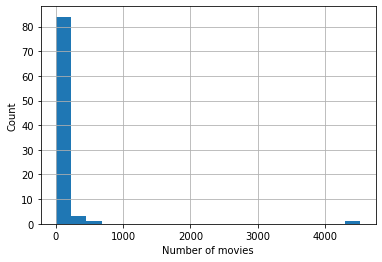

In [21]:
mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(df['spoken_languages']),
                   columns=mlb.classes_,
                   index=df.index)
res.sum().hist(bins=20)
plt.xlabel('Number of movies')
plt.ylabel('Count')

In [22]:
sum(res.sum()>5)

41

In [25]:
df = pd.concat([df, res], axis=1)

In [26]:
df = df.drop(['spoken_languages'], axis=1)

In [28]:
df

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,to,tr,uk,ur,vi,xh,xx,yi,zh,zu
0,556,258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,...,0,0,0,0,0,0,0,0,0,0
1,256296,250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,...,0,0,0,0,0,0,0,0,0,0
2,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,...,0,0,0,0,0,0,0,0,0,0
3,8917,1000000,"[{'id': 27, 'name': 'Horror'}]",NaN,9003,tt0093177,en,Hellraiser,An unfaithful wife encounters the zombie of he...,13.828,...,0,0,0,0,0,0,0,0,0,0
4,108693,15000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...",NaN,11153,tt0085995,en,National Lampoon's Vacation,Clark Griswold is on a quest to take his famil...,15.070,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,239968,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,78159,tt0088873,fr,"La cage aux folles III - ""Elles"" se marient",Third and final version of the La Cage aux Fol...,3.050,...,0,0,0,0,0,0,0,0,0,0
5211,111751,85000,"[{'id': 27, 'name': 'Horror'}]",NaN,30497,tt0072271,en,The Texas Chain Saw Massacre,When Sally hears that her grandfather's grave ...,11.580,...,0,0,0,0,0,0,0,0,0,0
5212,NaN,30000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,14342,tt0119053,en,Almost Heroes,Two hapless explorers lead an ill-fated 1804 e...,7.946,...,0,0,0,0,0,0,0,0,0,0
5213,NaN,20000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.eternalsunshine.com,38,tt0338013,en,Eternal Sunshine of the Spotless Mind,"Joel Barish, heartbroken that his girlfriend u...",19.693,...,0,0,0,0,0,0,0,0,0,0
